<a href="https://colab.research.google.com/github/ryankoul/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepen your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

## Cars Data Set
Below, we:
1. Link to the dataset URL via http to bypass the security warning from the [UCI website](https://archive.ics.uci.edu/ml/index.php).

2. Assign that URL to `car_data_url` for readability.

3. Curl the data set.

In [21]:
# Remove s from https to ignore expired SSL security warning
car_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

### df_cars Data Dictionary
The [data documentation (csv)](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names) lists 6 attributes, but the data output above shows a 7th: `car`. Thus, `df_cars` does *not* have the correct number of columns as described in the UCI page. 

Full column list:

1. `buying` : buying price
2. `maint` : maintenance price
3. `doors` : number of doors
4. `persons` : carrying capacity for persons
5. `lug_boot` : luggage boot size (trunk space)
6. `safety` : estimated car safety
7. `car` : overall car quality based on its previous 6 values

Let's take a closer look at our data set.

In [22]:
import pandas as pd

df_cars = pd.read_csv(car_data_url)
print(df_cars.head()) # display first 5 rows
print('\n')           # add a blank space
print(df_cars.tail()) # display last 5 rows

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


     vhigh vhigh.1      2   2.1 small   low  unacc
1722   low     low  5more  more   med   med   good
1723   low     low  5more  more   med  high  vgood
1724   low     low  5more  more   big   low  unacc
1725   low     low  5more  more   big   med   good
1726   low     low  5more  more   big  high  vgood


### First Observations
Missing header ––> mislabeled columns
   - Let's use the `names` parameter in `pandas.read_csv` to manually reassign column names, then print the first and last 5 rows

In [23]:
column_headers = ['buying', 'maint', 'doors', 
                  'persons', 'lug_boot', 'safety', 'car']

df_cars = pd.read_csv(car_data_url, names=column_headers)
print(df_cars.head())
print('\n')
print(df_cars.tail())

  buying  maint doors persons lug_boot safety    car
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


     buying maint  doors persons lug_boot safety    car
1723    low   low  5more    more      med    med   good
1724    low   low  5more    more      med   high  vgood
1725    low   low  5more    more      big    low  unacc
1726    low   low  5more    more      big    med   good
1727    low   low  5more    more      big   high  vgood


The columns now appear ordered and labeled. Let's proceed.

### Second Observation
Missing values

In the data documentation for `df_cars`, UCI reports there are no missing attribute values. Let's check.

In [44]:
# NaN values
print('NaN results:')
print(df_cars.isnull().sum())

# Shape
print('\n')
print('Shape: ')
print(df_cars.shape)

# Describe
print('\n')
print('Describe:')
df_cars.describe()

NaN results:
ERROR! Session/line number was not unique in database. History logging moved to new session 62
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car         0
dtype: int64


Shape: 
(1728, 7)


Describe:


,buying,maint,doors,persons,lug_boot,safety,car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,big,med,unacc
freq,432,432,432,576,576,576,1210


We see that there are 0 NaNs in `df_cars`, and the count of every attribute matches the count from `shape()`. Let's move on to the next data set.

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


### Load file locally

We'll work with a csv of forest fires: `df_fires`. 

[Source and documentation](https://archive.ics.uci.edu/ml/datasets/Forest+Fires).

In [50]:
from google.colab import files
uploaded = files.upload()

df_fires = pd.read_csv('forestfires.csv')

Saving forestfires.csv to forestfires (3).csv


### df_fires Data Dictionary
   1. `X` :  x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. `Y` : y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. `month` :  month of the year: "jan" to "dec" 
   4. `day` : day of the week: "mon" to "sun"
   5. `FFMC` : FFMC index from the FWI system: 18.7 to 96.20
   6. `DMC` : DMC index from the FWI system: 1.1 to 291.3 
   7. `DC` : DC index from the FWI system: 7.9 to 860.6 
   8. `ISI` : ISI index from the FWI system: 0.0 to 56.10
   9. `temp` : temperature in Celsius degrees: 2.2 to 33.30
   10. `RH`: relative humidity in %: 15.0 to 100
   11. `wind` : wind speed in km/h: 0.40 to 9.40 
   12. `rain` : outside rain in mm/m2 : 0.0 to 6.4 
   13. `area` : the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

### Check order and shape
Below, we'll:
1. Print the first and last five rows to examine the order.
2. Test if the data set shape matches the data set documentation.
   - UCI documentation reports 517 rows and 13 attributes.

In [49]:
# Check row length and column length
print('Shape:')
print(df_fires.shape, '\n')
assert df_fires.shape == (517, 13)

# Check order from top and bototm
print(df_fires.head()) # first five rows
print('\n')
print(df_fires.tail()) # last five rows





Shape:
(517, 13) 

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00


Nothing appears out of order and `assert` passed. Let's move on with our analysis.

## 3) Make Crosstabs of the Categorical Variables

We'll use `df_cars` our first data set, because it has more categorical variables.


In [52]:
pd.crosstab(df_cars['buying'], df_cars['maint'])


maint,high,low,med,vhigh
buying,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

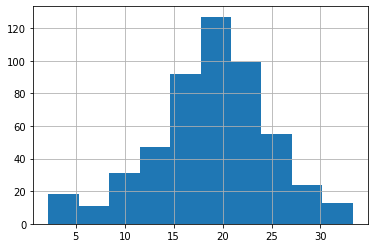

In [54]:
df_fires['temp'].hist(bins=10);

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# Your Code Here

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.